In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

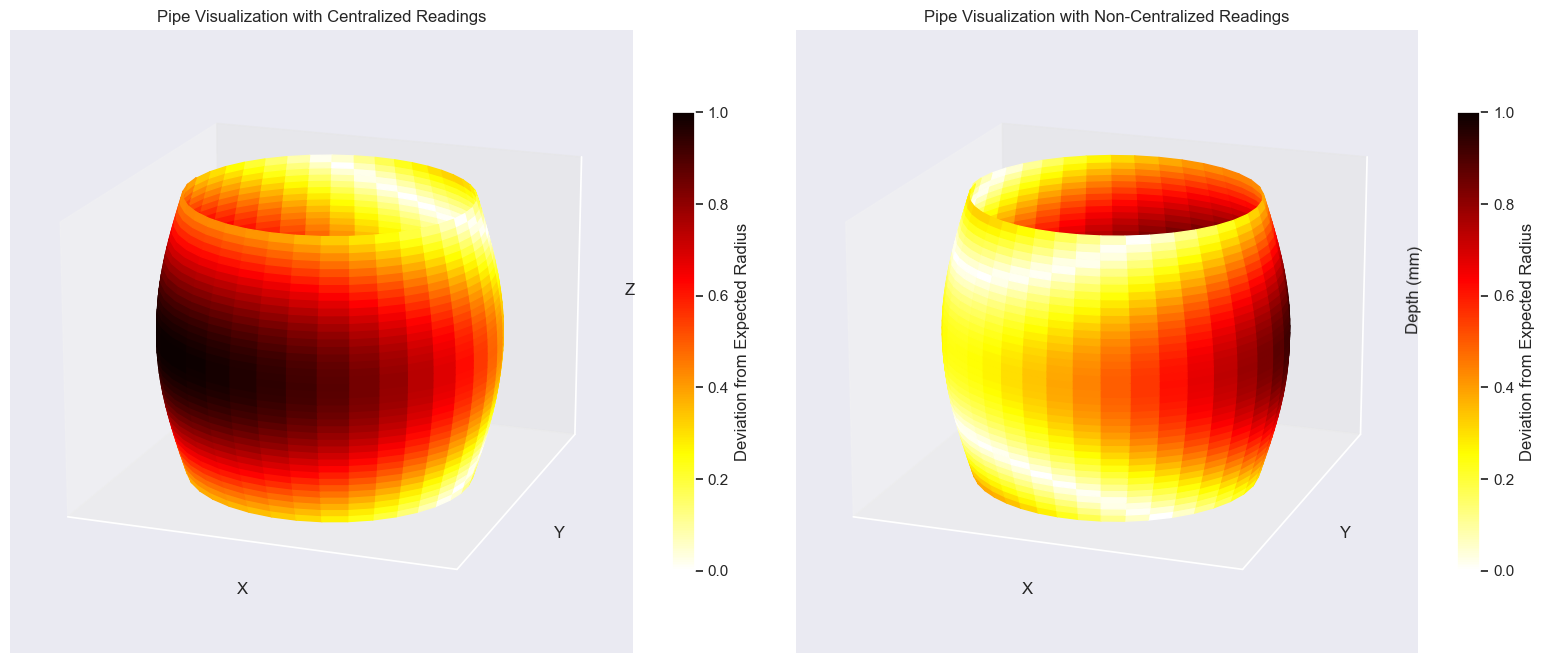

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Load the first data file
data_centralized = np.loadtxt('data/data_centralized.txt')

# Convert the data into a 3D cylindrical coordinate system
n_sensors = data_centralized.shape[1]
n_depths = data_centralized.shape[0]
theta = np.linspace(0, 2 * np.pi, n_sensors)  # evenly distributed angles around the pipe
z = np.arange(n_depths) * 5

# Create a grid of the theta and z values
theta_grid, z_grid = np.meshgrid(theta, z)

# Convert from cylindrical to Cartesian coordinates
x_centralized = data_centralized * np.cos(theta_grid)
y_centralized = data_centralized * np.sin(theta_grid)

# Compute the deviation from the expected radius
expected_radius = 127
deviation_centralized = np.abs(data_centralized - expected_radius)

# Create the first plot
fig = plt.figure(figsize=(16, 8))

# Plot for the centralized data
ax_centralized = fig.add_subplot(121, projection='3d')
surf_centralized = ax_centralized.plot_surface(
    x_centralized, y_centralized, z_grid,
    facecolors=plt.cm.hot_r(deviation_centralized / np.max(deviation_centralized)),
    shade=False
)

# Create a colorbar for the centralized data
colorbar_centralized = fig.colorbar(
    plt.cm.ScalarMappable(cmap=plt.cm.hot_r), ax=ax_centralized, shrink=0.6
)
colorbar_centralized.set_label('Deviation from Expected Radius')

# Set the axis labels for the centralized data
ax_centralized.set_xlabel('X')
ax_centralized.set_ylabel('Y')
ax_centralized.set_zlabel('Z')
ax_centralized.set_title('Pipe Visualization with Centralized Readings')

# Hide ticks
ax_centralized.set_xticks([])
ax_centralized.set_yticks([])
ax_centralized.set_zticks([])

# Load the second data file
data = np.loadtxt('data/data.txt')

# Convert the data into a 3D cylindrical coordinate system
n_sensors = data.shape[1]
n_depths = data.shape[0]

# Create a grid of the theta and z values
theta_grid, z_grid = np.meshgrid(theta, z)

# Convert from cylindrical to Cartesian coordinates
x = data * np.cos(theta_grid)
y = data * np.sin(theta_grid)

# Compute the deviation from the expected radius
deviation = np.abs(data - expected_radius)

# Plot for the second data
ax = fig.add_subplot(122, projection='3d')
surf = ax.plot_surface(
    x, y, z_grid,
    facecolors=plt.cm.hot_r(deviation / np.max(deviation)),
    shade=False
)

# Create a colorbar for the second data
colorbar = fig.colorbar(
    plt.cm.ScalarMappable(cmap=plt.cm.hot_r), ax=ax, shrink=0.6
)
colorbar.set_label('Deviation from Expected Radius')

# Set the axis labels for the second data
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Depth (mm)')
ax.set_title('Pipe Visualization with Non-Centralized Readings')

# Hide ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Adjust the layout
plt.tight_layout()

# # Set the rotation angles
# elevation_angle = 18
# azimuth_angle = 110

# # Rotate the plots
# ax_centralized.view_init(elevation_angle, azimuth_angle)
# ax.view_init(elevation_angle, azimuth_angle)

# Display the plots
plt.show()


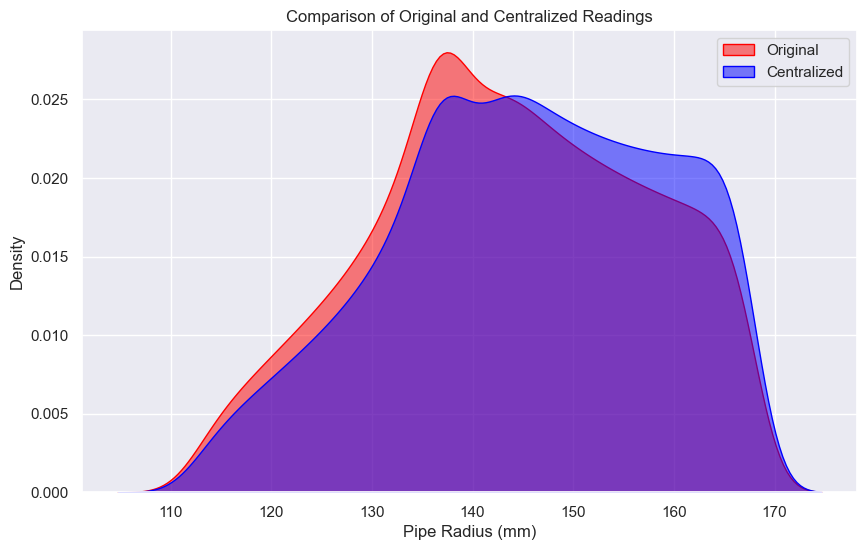

In [19]:
# Load the original data
data = np.loadtxt('data/data.txt')

# Load the centralized data
data_centralized = np.loadtxt('data/data_centralized.txt')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Flatten the data and plot as a KDE
sns.kdeplot(data.flatten(), ax=ax, color='red', fill=True, alpha=0.5, label='Original')
sns.kdeplot(data_centralized.flatten(), ax=ax, color='blue', fill=True, alpha=0.5, label='Centralized')

# Set labels and title
ax.set_xlabel("Pipe Radius (mm)")
ax.set_ylabel("Density")
ax.set_title('Comparison of Original and Centralized Readings')
ax.legend()

plt.show()


Max diff in median (original): 31.169999999999987
Max diff in median (centralized): 31.05200000000002


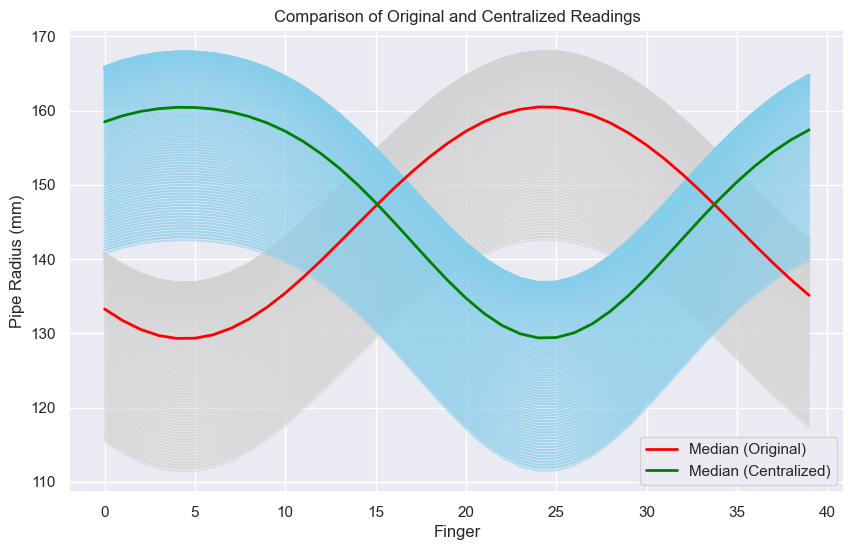

In [20]:
# Load the original data
data = np.loadtxt('data/data.txt')

# Load the centralized data
data_centralized = np.loadtxt('data/data_centralized.txt')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Use seaborn styles
sns.set()

# Plot the original data 
for finger, readings in enumerate(data):
    ax.plot(readings, color='lightgray', alpha=0.5)

# Plot the centralized data
for finger, readings in enumerate(data_centralized):
    ax.plot(readings, color='skyblue', alpha=0.5)

# Set labels and title
ax.set_xlabel("Finger")
ax.set_ylabel("Pipe Radius (mm)")
ax.set_title("Comparison of Original and Centralized Readings")

# Compute the median of the original data
median_original = np.median(data, axis=0)

# Compute the median of the centralized data
median_centralized = np.median(data_centralized, axis=0)

# Plot the median of the original data
ax.plot(median_original, label="Median (Original)", color='red', linewidth=2)

# Plot the median of the centralized data
ax.plot(median_centralized, label="Median (Centralized)", color='green', linewidth=2)

# Legend
ax.legend()

# Print fluctuations in median in the original data
print(f"Max diff in median (original): {np.max(median_original) - np.min(median_original)}")

# Print fluctuations in median in the centralized data
print(f"Max diff in median (centralized): {np.max(median_centralized) - np.min(median_centralized)}")

# Show the plot
plt.show()
